In [44]:
#---------------------------------------logistic Regression-------------------------------------------------------------
import numpy as np
import pandas as pd
import string

df = pd.read_csv('emails.csv')
#df['spam'].sum()

In [45]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
#df.info()

In [46]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FALCON\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
#removing punctuations,stopwords and numbers from data
df['text'] = df['text'].map(lambda text:re.sub('[^a-zA-Z-\']{1,}', ' ',text))
df.text = [x.strip('Subject') for x in df.text]
df['text'] = df['text'].apply(lambda x: x.split())
#df

In [48]:
df['text']=df['text'].apply(lambda text_list: list(filter(lambda text:text not in stop,text_list)))

In [49]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
ltr = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\FALCON\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
df['text']=df['text'].apply(lambda text_list: list(map(lambda word:ltr.lemmatize(word,'n'),text_list)))
df['text']=df['text'].apply(lambda text_list: list(map(lambda word:ltr.lemmatize(word,'v'),text_list)))
df['text']=df['text'].apply(lambda text_list: list(map(lambda word:ltr.lemmatize(word,'a'),text_list)))
df['text']=df['text'].apply(lambda text_list: list(map(lambda word:ltr.lemmatize(word,'r'),text_list)))
df["text"] = df['text'].apply(lambda rem : (list(filter(lambda x : len(x) > 2 ,rem))))

In [51]:
corpus = df['text'].apply(' '.join)

In [53]:
#creating featres from dataframe
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=10,max_df=400)
X = cv.fit_transform(corpus).toarray()
Y = df.iloc[:, 1].values

x=pd.DataFrame(X)
vocab_size = x.shape[1]
d = {'Spam': Y}
y=pd.DataFrame(data = d)
full_matrix = pd.merge(x,y,left_index=True,right_index=True,how='inner')


In [54]:
#Splitting train and test data randomly in 70-30 ratio
split = np.random.rand(len(full_matrix)) < 0.3
test=full_matrix[split]
train=full_matrix[~split]

In [55]:
#Labeling X_train and Y_train for training data
Y_train=train.loc[:,'Spam']
X_train = train.loc[:,train.columns != 'Spam']

In [56]:
#Labeling X_test and Y_test for test data
Y_test=test.loc[:,'Spam']
X_test = test.loc[:,test.columns != 'Spam']

In [59]:
#i am not so much good in classes but making this code with direct iteration is worse
#sometimes even i forgot the flow of program in iterations
# so lets try with class

class LRgression:
 #don't panic this is just constructor of this class which have some default values

    def __init__(self, lr, iteration, intercept=True, vbose=False):
    #print("-----------------------this is my constuctor-----------------------------------------")
        #this is my learning rate means how fast i go for goal
        self.lr = lr

        #this ensures that when i have to stop
        self.vbose=vbose 

         #this track number of iterations i am using
        self.iteration = iteration

         #this is just intercept whic i provide true
        self.intercept = intercept
    
    #this is the function which deal with intercept and update
    def Add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        #print(np.concatenate((intercept, X), axis=1))
        #print("abc")
        return np.concatenate((intercept, X), axis=1)
    
    #this is for just increasing the function i can do it by iterations but i think
    #functions are more interasting
    def Sigmoid(self, z):
        A=1 / (1 + np.exp(-z))
        #print(A)
        return A

    #this track the loss of my predictions and this is just implementation of formula
    #given in book so do not be panic i didn't do any great work i just write it from book
    def Loss(self, h, y):
        L=(-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        #print(L)
        return L
    
    #this function do the actual job i say it heart of my code
    def fit(self, X, y):
        if self.intercept:
            X = self.Add_intercept(X)
            #print(X)
        
        # weights initialization by zero it means all the values of weights is 0
        self.theta = np.zeros(X.shape[1])
        #print(self.theta)
        #i am not able to think about a recursive function for it so just go with for loop
        #and make code a little bit simple
        for i in range(self.iteration):
            z = np.dot(X, self.theta)
            h = self.Sigmoid(z)
            #print(h)
            #print('singh')
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.vbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.Sigmoid(z)
                print(f'loss: {self.Loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.intercept:
            X = self.Add_intercept(X)
        
        return self.Sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold



#now this is show time, i have to just call this class accordingly
#this is time to show the ability of my code
#print("-------------------------------game start----------------------------------------------------------------")

model = LRgression(lr=.1, iteration=100)
model.fit(X_train, Y_train)

predictions = model.predict(X_test,0.5)
#this shows the accuracy of predictions
print('Accuracy of Logistic model: ',round((predictions == Y_test).mean(),4)*100)

Accuracy of Logistic model:  90.58


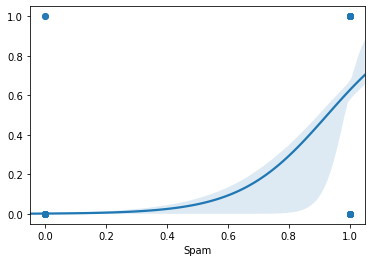

In [60]:
import seaborn as sns
sns.regplot(x=Y_test, y=predictions, logistic=True)
result=pd.DataFrame(predictions)
result=result*1
#result.head(10)

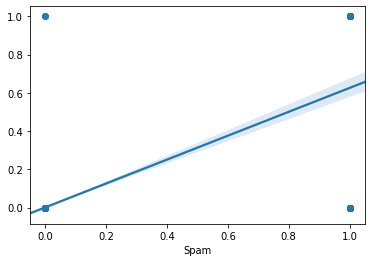

In [61]:
import seaborn as sns
sns.regplot(x=Y_test, y=predictions)

In [62]:
result = result.head(100)

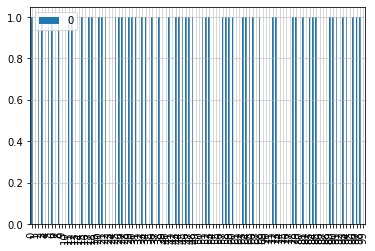

In [63]:
result.plot(kind = 'bar')

import matplotlib.pyplot as plt 
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()